In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import lib_data_load as ld
import lib_data_ref as dr
import seaborn as sns

dir_data = ".\\data\\data_gouv_fr\\"

# Usagers
dic_usagers = ld.load_usagers(folder_path=dir_data, start_year=2020, end_year=2021)

# Caractéristiques
dic_caract = ld.load_caract(folder_path=dir_data, start_year=2020, end_year=2021)

df_usagers = dic_usagers[2020]
df_caract = dic_caract[2020]

## Merge data et suppression des colonnes inutiles

In [2]:
#  merge usagers and caracteristiques
df = df_usagers.merge(right=df_caract, on='Num_Acc', how='left')

# inutiles : ['id_vehicule', 'num_veh', 'adr'] 
df = df.drop(columns=['id_vehicule', 'num_veh', 'adr', 'lat', 'long'], axis=1)

## Encodages

In [3]:
# création de 4 classes basée sur les quartiles
# df['age'].describe()
def get_cl_age(age):
    if age <= 25:
        return '0-25'
    if 25 < age <= 37:
        return '26-37'
    if 37 < age <= 53:
        return '38-53'
    if 53 < age:
        return '>53'

df['luminosité'] = df['lum'].apply(lambda i: dr.get_labels('lum', i))
df['gravité'] = df['grav'].apply(lambda i: dr.get_labels('grav', i))
df['age'] = 2022 - df['an_nais']
df["classe d'age"] = [get_cl_age(age) for age in df['age']]
df["catégorie d'utilisateur"] = df['catu'].apply(lambda i: dr.get_labels('catu', i))
df["sexe_lbl"] = df['sexe'].apply(lambda i: dr.get_labels('sexe', i))

df = df.drop(columns=['an_nais', 'age'], axis=1)

columns_titles = ['Tué', 'Blessé hospitalisé', 'Blessé léger', 'Indemne']

## Relation Gravité - Luminosité

gravité                                     Tué  Blessé hospitalisé  \
luminosité                                                            
Crépuscule ou aube                     0.028208            0.169103   
Nuit avec éclairage public allumé      0.017967            0.135438   
Nuit avec éclairage public non allumé  0.037618            0.171369   
Nuit sans éclairage public             0.067069            0.235936   
Plein jour                             0.022039            0.152508   

gravité                                Blessé léger   Indemne  
luminosité                                                     
Crépuscule ou aube                         0.396375  0.406314  
Nuit avec éclairage public allumé          0.452098  0.394497  
Nuit avec éclairage public non allumé      0.430512  0.360502  
Nuit sans éclairage public                 0.368925  0.328071  
Plein jour                                 0.397154  0.428299  


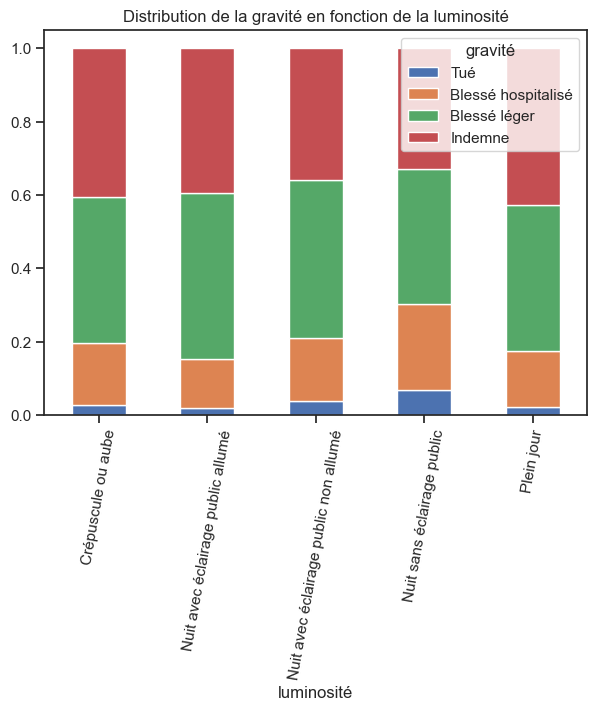

In [4]:
df_cross = pd.crosstab(df['luminosité'], df['gravité'], normalize='index')
df_cross = df_cross.reindex(columns=columns_titles)
print(df_cross)

sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 5))
chart = df_cross.plot(kind="bar", stacked=True, rot=0, ax=ax, 
                         title='Distribution de la gravité en fonction de la luminosité')
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
sns.move_legend(ax, "upper right")


In [5]:
df_caract.columns

Index(['Num_Acc', 'jour', 'mois', 'an', 'hrmn', 'lum', 'dep', 'com', 'agg',
       'int', 'atm', 'col', 'adr', 'lat', 'long'],
      dtype='object')